# Perform image registration to correct motion 

Memory maps a file and performs motion correction. Use ``apply_shifts=False`` to run without changing the data.

The file needs to be mapped in ``r+`` mode


In [2]:
localdisk = 'd://temp_folder/CSP23_20200226/' # this should be an SSD or a fast drive
from wfield import *

dat_path = glob(pjoin(localdisk,'*.dat'))[0]
# open file with read/write 
dat = mmap_dat(dat_path, mode='r+')

yshifts,xshifts = motion_correct(dat[:10000],chunksize=512,
                                 apply_shifts=False)
del dat # close and finish writing

# save the shifts
shifts = np.rec.array([yshifts,xshifts],dtype=[('y','int'),('x','int')])
np.save(pjoin(localdisk,'motion_correction_shifts.npy'),shifts)


Motion correction: 100%|██████████| 20/20 [01:44<00:00,  5.22s/it]


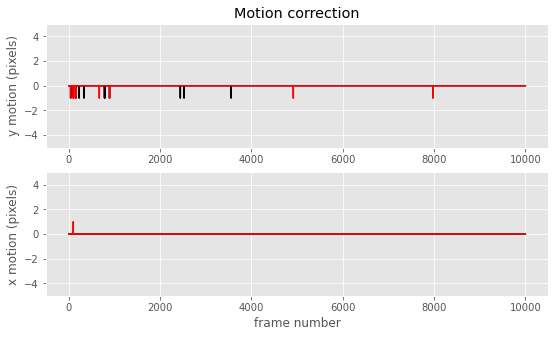

In [3]:
# plot the shifts
%matplotlib inline

plt.matplotlib.style.use('ggplot')
fig = plt.figure(figsize=[9,5])

fig.add_subplot(2,1,1)
plt.plot(yshifts[:,0],'k')
plt.plot(yshifts[:,1],'r')
plt.title('Motion correction')
plt.ylabel('y motion (pixels)')
plt.ylim([-5,5])

fig.add_subplot(2,1,2)
plt.plot(xshifts[:,0],'k')
plt.plot(xshifts[:,1],'r')
plt.ylim([-5,5])
plt.ylabel('x motion (pixels)')
plt.xlabel('frame number');